In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

print("done")

done


In [ ]:
!wget -O data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv


--2021-08-05 08:07:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>]  35.20K  --.-KB/s    in 0.002s  

2021-08-05 08:07:15 (18.9 MB/s) - ‘data.csv’ saved [36047/36047]



In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df['custcat'].value_counts()
#df.hist(column = 'income', bins = 50, color = 'r')
df.columns
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
y = df['custcat'].values


In [ ]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4 
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
yhat = neigh.predict(x_test)
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_train, neigh.predict(x_train))

0.5475

In [ ]:
metrics.accuracy_score(y_test, neigh.predict(x_test))

0.32

In [ ]:
ks = 10
mean_acc = np.zeros(((ks-1)))
mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
std_acc = np.zeros((ks-1))
std_acc
for n in range(1, ks):
  neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
  mean_acc[n-1] = metrics.accuracy_score(y_test, neigh.predict(x_test))
  std_acc[n-1] = np.std(neigh.predict(x_test) == y_test)/np.sqrt(neigh.predict(x_test).shape[0])
print(mean_acc)
print(std_acc)

[False False False False  True False False False False False False False
  True False False  True False  True False  True False False False False
 False False False False False False False False  True False False False
  True False False False False  True False False  True False False False
 False  True False False  True False False False  True  True  True False
  True False False  True  True  True False False False False  True False
  True False  True False False  True False False False False False  True
  True False  True  True False  True False False  True  True False False
 False False  True False False False  True  True False False  True False
 False False False False False False  True False False False False False
 False False  True  True  True False False  True False False  True  True
 False False False False False False False False False  True False False
  True  True False  True False False False False False False  True False
 False False False False  True  True  True False Fa

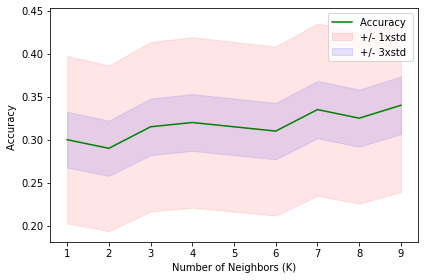

The best accuracy was with 0.34 with k= 9


In [ ]:
plt.plot(range(1,ks),mean_acc,'g')

plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10,color='blue')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 